# Running of $\alpha_s$ in the TeV Range

Comparison of our `qcd.alpha_s()` calculation (low and high precision modes)
against recent LHC measurements of the strong coupling at high energy scales.

**Experimental data:**
- CMS inclusive jets at NNLO (arXiv:2412.16665, Dec 2024) — running probed up to 1.6 TeV
- Dijet cross sections at NNLO (arXiv:2412.21165, Dec 2024) — first $\alpha_s$ determination up to 7 TeV

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qcd import alpha_s_array

In [3]:
# Theory curves: 1 -- 10 TeV
mu = np.linspace(1000, 10000, 500)

alpha_high = alpha_s_array(mu, precision='high')  # 4-loop, 3-loop decoupling
alpha_low  = alpha_s_array(mu, precision='low')   # 3-loop, continuous matching

print(f"alpha_s(1 TeV)  high={alpha_high[0]:.4f}  low={alpha_low[0]:.4f}")
print(f"alpha_s(10 TeV) high={alpha_high[-1]:.4f}  low={alpha_low[-1]:.4f}")
print(f"Max relative difference: {np.max(np.abs(alpha_high - alpha_low) / alpha_high) * 100:.2f}%")

alpha_s(1 TeV)  high=0.0885  low=0.0885
alpha_s(10 TeV) high=0.0718  low=0.0718
Max relative difference: 0.02%


In [4]:
# --- Experimental data ---

# CMS inclusive jets, NNLO (arXiv:2412.16665, Dec 2024)
# Cross-section-weighted average jet pT as the scale
cms_Q     = np.array([1600.5])
cms_alpha = np.array([0.0821])
cms_err   = np.array([0.0007])  # total uncertainty

# Dijet cross sections, NNLO (arXiv:2412.21165, Dec 2024)
# Uncertainties: (fit)(stat)(scale) added in quadrature
dijet_Q     = np.array([1175, 1760, 2545, 3490, 4880, 7040])
dijet_alpha = np.array([0.0848, 0.0813, 0.0783, 0.0760, 0.0742, 0.0734])
dijet_fit   = np.array([0.0008, 0.0008, 0.0008, 0.0008, 0.0012, 0.0043])
dijet_stat  = np.array([0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0004])
dijet_scale = np.array([0.0011, 0.0011, 0.0012, 0.0012, 0.0013, 0.0013])
dijet_err   = np.sqrt(dijet_fit**2 + dijet_stat**2 + dijet_scale**2)

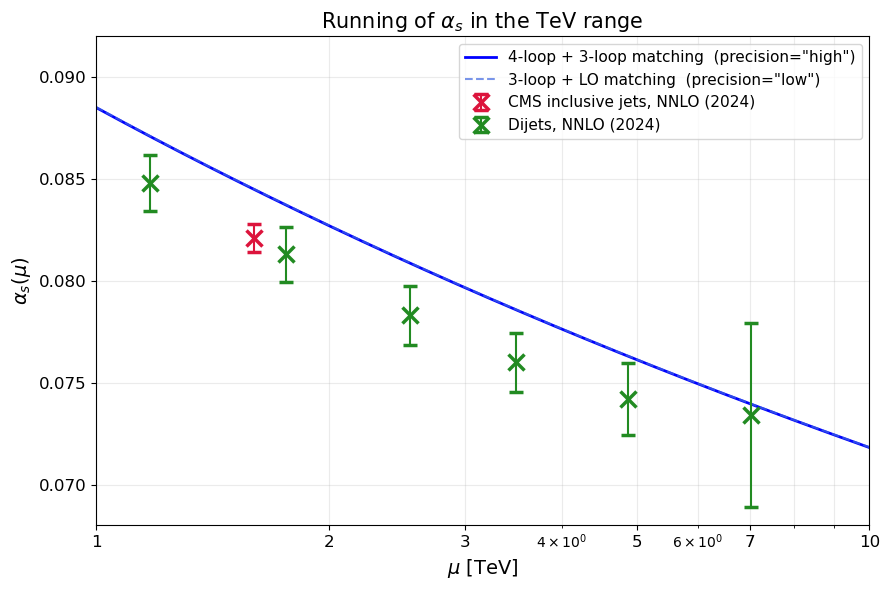

In [5]:
fig, ax = plt.subplots(figsize=(9, 6))

# Theory bands
ax.plot(mu / 1000, alpha_high, 'b-', linewidth=2,
        label=r'4-loop + 3-loop matching  (precision="high")')
ax.plot(mu / 1000, alpha_low, color='royalblue', linestyle='--',
        linewidth=1.5, alpha=0.7,
        label=r'3-loop + LO matching  (precision="low")')

# CMS inclusive jets
ax.errorbar(cms_Q / 1000, cms_alpha, yerr=cms_err,
            fmt='x', color='crimson', markersize=11, markeredgewidth=2.5,
            capsize=5, linewidth=1.5, capthick=1.5,
            label='CMS inclusive jets, NNLO (2024)')

# Dijet NNLO
ax.errorbar(dijet_Q / 1000, dijet_alpha, yerr=dijet_err,
            fmt='x', color='forestgreen', markersize=11, markeredgewidth=2.5,
            capsize=5, linewidth=1.5, capthick=1.5,
            label='Dijets, NNLO (2024)')

ax.set_xscale('log')
ax.set_xlabel(r'$\mu$ [TeV]', fontsize=14)
ax.set_ylabel(r'$\alpha_s(\mu)$', fontsize=14)
ax.set_title(r'Running of $\alpha_s$ in the TeV range', fontsize=15)

ax.set_xlim(1, 10)
ax.set_ylim(0.068, 0.092)

# Nice x-tick labels in TeV
ax.set_xticks([1, 2, 3, 5, 7, 10])
ax.set_xticklabels(['1', '2', '3', '5', '7', '10'])
ax.tick_params(axis='both', labelsize=12)

ax.legend(fontsize=11, loc='upper right')
ax.grid(True, alpha=0.25, which='both')

fig.tight_layout()
plt.savefig('alpha_s_tev.pdf', bbox_inches='tight')
plt.show()

## Notes

The two precision modes are nearly indistinguishable in this range (sub-percent difference),
confirming that `precision='low'` is adequate for the RS parameter scanning in this project.

### References

- CMS Collaboration, "Determination of the strong coupling and its running from measurements
  of inclusive jet production", arXiv:2412.16665 (2024)
- Britzger, Rabbertz, Savoiu, Schnell, Wobisch, "Precise Determination of the Strong Coupling
  Constant from Dijet Cross Sections up to the Multi-TeV Range", arXiv:2412.21165 (2024)
- PDG 2024, "Quantum Chromodynamics" review